# LeNet 5 in Keras 2.0

### Based on the Keras MNIST example

https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

and


and LeCun's website
http://yann.lecun.com/exdb/lenet/

see also:

https://www.slideshare.net/SomnathBanerjee17/lenet-to-resnet

http://slazebni.cs.illinois.edu/spring17/lec01_cnn_architectures.pdf

In [1]:
import numpy as np
import tensorflow as tf
import keras

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from scipy.linalg import svd

import import_ipynb

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

/Users/charlesmartin14/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/charlesmartin14/.local/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import RMT_Util

importing notebook from RMT_Util.ipynb
3.6.5 |Anaconda custom (64-bit)| (default, Apr 26 2018, 08:42:37) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
numpy version 1.14.2
scipy version 1.0.1
tensforflow version 1.5.0-dev20171116
keras version 2.1.5
sklearn version 0.19.1
powerlaw version 1.4.3


### Display

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5,5]
matplotlib.rcParams.update({'font.size': 16})
plt.tight_layout()

<Figure size 360x360 with 0 Axes>

### Params

In [4]:
batch_size = 128
num_classes = 10
epochs = 10

### MNIST Data

Recale from [0,255] to [0,1.0]

### Differences from original LeNet:

(32 x 32) now (28 x 28) => Conv2D sizes a bit up for grabs

sigmoid activations



In [5]:
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print('labels, categorical: ',y_train.shape, y_test.shape)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
labels, categorical:  (60000, 10) (10000, 10)


## LeNet 5 Modern Version

Uses ReLu , Dropout

In [6]:
model = Sequential()

 # first set of CONV => RELU => POOL
model.add(Conv2D(20, kernel_size=(5,5),activation='relu',border_mode="same",input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

# second set of CONV => RELU => POOL
model.add(Conv2D(50, kernel_size=(5,5), activation='relu', border_mode="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
      
# set of FC => RELU layers
model.add(Flatten())
model.add(Dense(500, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(20, kernel_size=(5, 5), activation="relu", input_shape=(28, 28, 1..., padding="same")`
  after removing the cwd from sys.path.
/Users/charlesmartin14/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(50, kernel_size=(5, 5), activation="relu", padding="same")`
  


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 20)        520       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 50)        25050     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 50)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2450)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               1225500   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5010      
Total para

In [8]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


In [9]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 180s 3ms/step - loss: 0.1929 - acc: 0.9393 - val_loss: 0.0560 - val_acc: 0.9818
Epoch 2/10
60000/60000 [==============================] - 114s 2ms/step - loss: 0.0472 - acc: 0.9850 - val_loss: 0.0303 - val_acc: 0.9894
Epoch 3/10
60000/60000 [==============================] - 123s 2ms/step - loss: 0.0298 - acc: 0.9907 - val_loss: 0.0333 - val_acc: 0.9889
Epoch 4/10
60000/60000 [==============================] - 130s 2ms/step - loss: 0.0212 - acc: 0.9933 - val_loss: 0.0477 - val_acc: 0.9824
Epoch 5/10
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0166 - acc: 0.9948 - val_loss: 0.0309 - val_acc: 0.9887
Epoch 6/10
60000/60000 [==============================] - 104s 2ms/step - loss: 0.0121 - acc: 0.9962 - val_loss: 0.0251 - val_acc: 0.9915
Epoch 7/10
60000/60000 [==============================] - 106s 2ms/step - loss: 0.0088 - acc: 0.9972 - val_loss: 0.0227 - 

### Marhcenko Pastur Fit

In [10]:
W = model.layers[5].get_weights()[0]
u, sv, vh = svd(W)
evals = sv*sv

RMT_Util.ipynb:7: RuntimeWarning: divide by zero encountered in true_divide
  "## RMT Util\n",
RMT_Util.ipynb:7: RuntimeWarning: invalid value encountered in sqrt
  "## RMT Util\n",


% spikes outside bulk 5.26
% sigma 1.2946


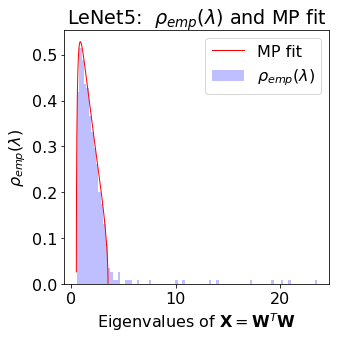

In [11]:
Q = W.shape[0]/W.shape[1]
num_spikes = 25
sigma = RMT_Util.plot_ESD_and_fit(model=None, eigenvalues=evals, weightfile=None, 
                          layer=5,  Q=Q, num_spikes=num_spikes, sigma=None, color='blue')
plt.title(r"LeNet5:  $\rho_{emp}(\lambda)$ and MP fit")
plt.xlabel("Eigenvalues of $\mathbf{X}= \mathbf{W}^{T}\mathbf{W}$")
plt.ylabel(r"$\rho_{emp}(\lambda)$")
plt.legend()
plt.tight_layout()
plt.savefig('img/lenet5.png', bbox_inches='tight')

RMT_Util.ipynb:7: RuntimeWarning: divide by zero encountered in true_divide
  "## RMT Util\n",
RMT_Util.ipynb:7: RuntimeWarning: invalid value encountered in sqrt
  "## RMT Util\n",


% spikes outside bulk 5.26
% sigma 1.2946


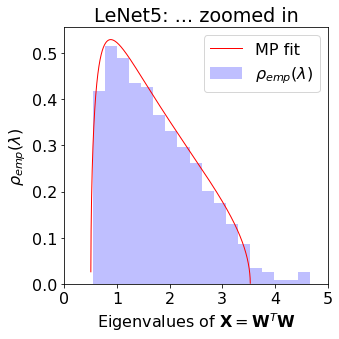

In [12]:
Q = W.shape[0]/W.shape[1]
num_spikes = 25
sigma = RMT_Util.plot_ESD_and_fit(model=None, eigenvalues=evals, weightfile=None, 
                          layer=5,  Q=Q, num_spikes=num_spikes, sigma=None, color='blue')
plt.title(r"LeNet5: ... zoomed in")
plt.xlabel("Eigenvalues of $\mathbf{X}= \mathbf{W}^{T}\mathbf{W}$")
plt.ylabel(r"$\rho_{emp}(\lambda)$")
plt.xlim(0,5)
plt.legend()
plt.tight_layout()
plt.savefig('img/lenet5_zoomed.png', bbox_inches='tight')

RMT_Util.ipynb:7: RuntimeWarning: divide by zero encountered in true_divide
  "## RMT Util\n",
RMT_Util.ipynb:7: RuntimeWarning: invalid value encountered in sqrt
  "## RMT Util\n",


% spikes outside bulk 5.36
% sigma 1.3000


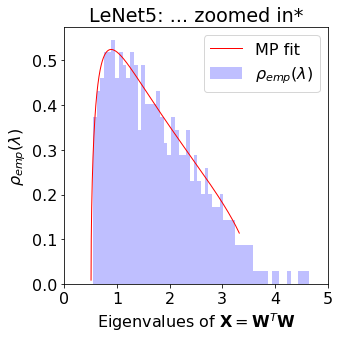

In [13]:
Q = W.shape[0]/W.shape[1]
num_spikes = 25
sigma = RMT_Util.plot_ESD_and_fit(eigenvalues=evals[evals<10],
                          layer=5,  Q=Q, num_spikes=num_spikes, sigma=1.3, color='blue')
plt.title(r"LeNet5: ... zoomed in*")
plt.xlabel("Eigenvalues of $\mathbf{X}= \mathbf{W}^{T}\mathbf{W}$")
plt.ylabel(r"$\rho_{emp}(\lambda)$")
plt.xlim(0,5)
plt.legend()
plt.tight_layout()
plt.savefig('img/lenet5_zoomed2.png', bbox_inches='tight')